# SmartPath Career Recommendation System

<img src = images\smart_path.png alt = 'Smart Path' width= 300>

## Problem Statement
In today’s global economy, the job market is evolving rapidly due to technology, automation, and changing skill demands. Meanwhile, students and job seekers, especially youth in underserved areas, struggle to make informed career decisions due to limited access to personalized, up-to-date guidance. Traditional career counseling services are often generic, inaccessible, or disconnected from real-world occupational data. As a result, many individuals pursue careers misaligned with their potential, leading to underemployment, poor job satisfaction, and wasted educational resources. SmartPath aims to address this gap by leveraging data from the O*NET occupational database to offer intelligent, personalized career recommendations based on a user's skills, interests, and education level.

## Project Goal 
SmartPath aims to build a personalized, data-driven career recommendation system that:

- Aligns individual users with career paths based on their unique skills, interests, and educational background.
- Recommends alternative or adjacent careers that fit their profile.
- Provides insights into job requirements, skill gaps, and occupational attributes.
- Empowers users to make confident, informed career decisions using structured occupational data.

## Scope of the Project
The project will: 
- Use structured occupational data to model job profiles.
- Accept user input related to skills, interests (RIASEC), and education level.
- Compute similarity between the user’s profile and job profiles to generate career recommendations.
- Display top matches, skill requirements, job descriptions, and related occupations.
- Provide a simple user interface to interact with the recommendation engine.

## 1. DATA UNDERSTANDING

### 1.1. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### 1.2. Loading the Dataset

In [2]:
# Defining path to the dataset folder
data_path = 'data'

# Loading core datasets 
occupation_df = pd.read_excel(f'{data_path}/Occupation Data.xlsx')
interests_df = pd.read_excel(f'{data_path}/Interests.xlsx')
skills_df = pd.read_excel(f'{data_path}/Skills.xlsx')
education_df = pd.read_excel(f'{data_path}/Education, Training, and Experience.xlsx')
related_df = pd.read_excel(f'{data_path}/Related Occupations.xlsx')
abilities_df = pd.read_excel(f'{data_path}/Abilities.xlsx')
emerging_tasks_df = pd.read_excel(f'{data_path}/Emerging Tasks.xlsx')
edu_categories_df = pd.read_excel(f'{data_path}/Education, Training, and Experience Categories.xlsx')

### 1.3. Quick Peek at Data

In [3]:
# View structure of each DataFrame
print("Occupations:", occupation_df.shape)
print("Interests:", interests_df.shape)
print("Skills:", skills_df.shape)
print("Education:", education_df.shape)
print("Related Jobs:", related_df.shape)
print("Abilities:", abilities_df.shape)
print("Emerging Tasks:", emerging_tasks_df.shape)
print("Education Categories:", edu_categories_df.shape)

# Display sample rows
occupation_df.head(3)

Occupations: (1016, 3)
Interests: (8307, 9)
Skills: (61530, 15)
Education: (36209, 15)
Related Jobs: (18460, 6)
Abilities: (91416, 15)
Emerging Tasks: (295, 8)
Education Categories: (41, 6)


,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."


In [4]:
occupation_df.head()
interests_df.head()
skills_df.head()
education_df.head()
related_df.head()
abilities_df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst


### 1.4. Data Structure

In [5]:
occupation_df.columns  # See column names
interests_df.columns
skills_df.columns
education_df.columns
related_df.columns

Index(['O*NET-SOC Code', 'Title', 'Related O*NET-SOC Code', 'Related Title',
       'Relatedness Tier', 'Index'],
      dtype='object')

### 1.5. Basic Cleanup & Rename 
* We’re renaming columns in the datasets for consistency and readability:
     - Shorter column names (e.g., ONET_Code instead of 'O*NET-SOC Code')
     - Standard naming across datasets
     - Prepping for merging- Having it renamed uniformly avoids bugs and errors.

In [6]:
# Renaming for clarity
occupation_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)
interests_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)
skills_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)
education_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)
related_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)

# Standardize abilities columns
abilities_df = abilities_df[['O*NET-SOC Code', 'Element Name', 'Scale ID', 'Data Value']]
abilities_df.rename(columns={'O*NET-SOC Code': 'ONET_Code', 'Element Name': 'Ability'}, inplace=True)
abilities_df = abilities_df[abilities_df['Scale ID'] == 'IM']  # Keep only 'Importance'
abilities_df.drop(columns='Scale ID', inplace=True)

# Standardize emerging tasks and education categories
emerging_tasks_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)
edu_categories_df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)

In [7]:
# Merging education data with categories
education_df_with_cat = education_df.merge(
    edu_categories_df[['Element ID', 'Category', 'Category Description']],
    on='Element ID',
    how='left'
)

# Renaming columns for clarity
education_df_with_cat.rename(columns={
    'Element Name': 'Prep Component',
    'Category_y': 'Preparation Type',  # <- Add this line
    'Category Description': 'Preparation Level'
}, inplace=True)

# preview
education_df_with_cat[['ONET_Code', 'Prep Component', 'Preparation Type', 'Preparation Level']].head()

,ONET_Code,Prep Component,Preparation Type,Preparation Level
0,11-1011.00,Required Level of Education,1.0,Less than a High School Diploma
1,11-1011.00,Required Level of Education,2.0,High School Diploma - or the equivalent (for e...
2,11-1011.00,Required Level of Education,3.0,Post-Secondary Certificate - awarded for train...
3,11-1011.00,Required Level of Education,4.0,Some College Courses
4,11-1011.00,Required Level of Education,5.0,Associate's Degree (or other 2-year degree)


## 2.DATA PREPARATION
We'll now:
- Extract RIASEC profiles per occupation
- Aggregate skills by occupation
- Get education level for each occupation
- Merge all into one clean job profile DataFrame

### 2.1 Transforming Interests and Creating RIASEC Vectors
RIASEC Vectors refer to a structured way of representing a person’s career interests using the RIASEC model, developed by psychologist John L. Holland.
| Code | Interest Type | Description                                     |
| ---- | ------------- | ----------------------------------------------- |
| R    | Realistic     | Practical, hands-on, physical activities        |
| I    | Investigative | Analytical, intellectual, scientific tasks      |
| A    | Artistic      | Creative, unstructured, expressive work         |
| S    | Social        | Helping, teaching, interacting with people      |
| E    | Enterprising  | Persuasive, leadership, business-oriented       |
| C    | Conventional  | Detail-oriented, organizational, administrative |

Each person has a RIASEC profile (a combination (vector) of these six interests).

Each occupation appears multiple times in interests_df — once for each of the 6 RIASEC types.

We want to pivot this From:
| ONET\_Code | Element Name  | Data Value |
| ---------- | ------------- | ---------- |
| 11-1011.00 | Realistic     | 1.38       |
| 11-1011.00 | Investigative | 2.25       |
| 11-1011.00 | Enterprising  | 4.63       |
| ...        | ...           | ...        |

To:
| ONET\_Code | Realistic | Investigative | Artistic | Social | Enterprising | Conventional |
| ---------- | --------- | ------------- | -------- | ------ | ------------ | ------------ |
| 11-1011.00 | 1.38      | 2.25          | 0.75     | 1.12   | 4.63         | 2.50         |

### 2.1.1 Pivot RIASEC scores

In [8]:
# Pivoting the interests to get one row per job with RIASEC scores
riasec_df = interests_df.pivot_table(index='ONET_Code',
                                     columns='Element Name',
                                     values='Data Value').reset_index()

# Renaming columns for consistency
riasec_df.columns.name = None  # To remove multiindex
riasec_df.rename(columns={
    'Realistic': 'R',
    'Investigative': 'I',
    'Artistic': 'A',
    'Social': 'S',
    'Enterprising': 'E',
    'Conventional': 'C'
}, inplace=True)

# Preview RIASEC vectors
riasec_df.head()

,ONET_Code,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point
0,11-1011.00,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0
1,11-1011.03,2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0
2,11-1021.00,1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0
3,11-1031.00,2.70,3.62,5.52,5.0,3.35,1.54,4.0,3.69,6.0
4,11-2011.00,3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0


We now have RIASEC personality scores per job.

### 2.2 Transform Skills (Aggregating Top Skills per Job)

In [9]:
# Exploring what's in skills_df
skills_df['Scale ID'].value_counts()

Scale ID
IM    30765
LV    30765
Name: count, dtype: int64

O*NET provides two types of metrics for each skill:
| Scale ID | Meaning        | Description                                                          |
| -------- | -------------- | -------------------------------------------------------------------- |
| `IM`     | **Importance** | How critical the skill is to job performance                         |
| `LV`     | **Level**      | The degree of complexity or expertise required to perform that skill |

We'll keep only IM for now and pivot the top 10 skills:
- We'll use IM to prioritize what matters most in each job for similarity and recommendation.
- We may use LV later for skill gap analysis, upskilling paths, or to enrich the UI.

This will keep our recommender fast and user-friendly, while allowing deeper features later.

### 2.2.1 Filtering top skills by importance
We'll extract the top N important skills per occupation.

In [10]:
# Filtering only 'Importance' scores
important_skills_df = skills_df[skills_df['Scale ID'] == 'IM']

# Keeping top 10 most important skills per job
top_skills_df = important_skills_df.groupby('ONET_Code', group_keys=False).apply(
    lambda x: x.sort_values(by='Data Value', ascending=False).head(10)
).reset_index(drop=True)

# Preview of top skills for one job
top_skills_df[top_skills_df['ONET_Code'] == '11-1011.00']

C:\Users\eugene.maina\AppData\Local\Temp\ipykernel_12860\1294161005.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_skills_df = important_skills_df.groupby('ONET_Code', group_keys=False).apply(


,ONET_Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.B.4.e,Judgment and Decision Making,IM,Importance,4.75,8,0.1637,4.4292,5.0000,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,2.A.2.a,Critical Thinking,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
2,11-1011.00,Chief Executives,2.B.2.i,Complex Problem Solving,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,2.B.5.d,Management of Personnel Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
4,11-1011.00,Chief Executives,2.B.1.b,Coordination,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
5,11-1011.00,Chief Executives,2.B.5.b,Management of Financial Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
6,11-1011.00,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
7,11-1011.00,Chief Executives,2.B.4.h,Systems Evaluation,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
8,11-1011.00,Chief Executives,2.B.4.g,Systems Analysis,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
9,11-1011.00,Chief Executives,2.B.1.d,Negotiation,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst


This top_skills_df now gives us:
- A ranked list of the most important skills per job useful for matching a user’s known skills to jobs where they matter most. These skills can later be vectorized for similarity in our recommender


| Column                              | Meaning                                                   |
| ----------------------------------- | --------------------------------------------------------- |
| `ONET_Code`                         | The job (e.g., `11-1011.00` = Chief Executives)           |
| `Element Name`                      | The skill being rated (e.g., Critical Thinking)           |
| `Data Value`                        | **Importance score** from 0–5 (how critical the skill is) |
| `N`                                 | Sample size (e.g., how many people/data points)           |
| `Standard Error`                    | Confidence level of the rating                            |
| `Lower CI Bound` & `Upper CI Bound` | Confidence intervals                                      |
| `Domain Source`                     | Analyst = Provided by experts (vs incumbents or surveys)  |

### 2.2.2 Top required skills across occupations
To help make our recommendations more explainable.

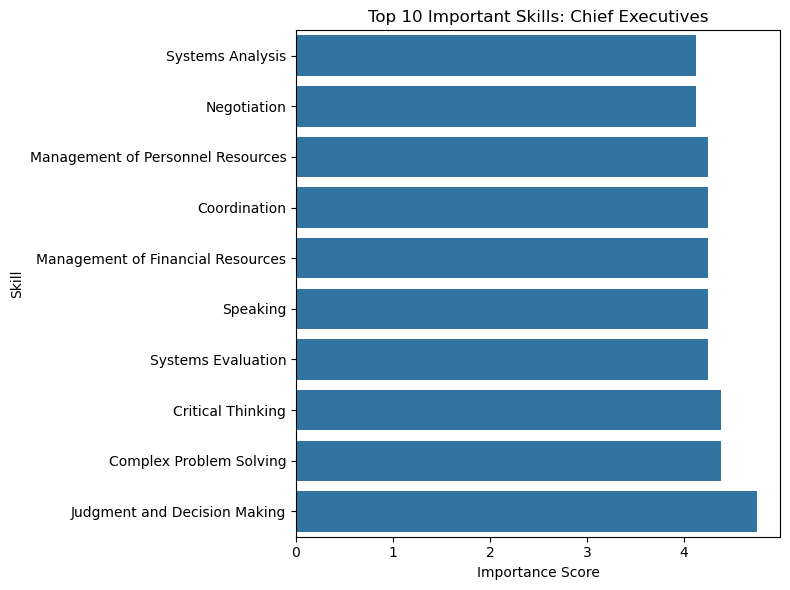

In [11]:
# Top 10 Skills for a Sample Job
onet_id = '11-1011.00'  
job_skills = top_skills_df[top_skills_df['ONET_Code'] == onet_id]

plt.figure(figsize=(8,6))
sns.barplot(x='Data Value', y='Element Name', data=job_skills.sort_values('Data Value'))
plt.title("Top 10 Important Skills: Chief Executives")
plt.xlabel("Importance Score")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig('images/top_skills_chief_executives.png', dpi=300)
plt.show()

**Interpretation:**
- This bar chart shows the top 10 most important skills required for the occupation Chief Executives, based on the O*NET skill importance ratings.

**Key Insights:**
- The most valued skills include Judgment and Decision Making, Complex Problem Solving, and Critical Thinking.
- Soft leadership abilities like Coordination and Speaking are equally emphasized.
- This visual helps users identify key competencies to develop if they’re aiming for executive roles.

### 2.3 Education Level Per Job
Here we are extracting the most common minimum required education level per job.

In [12]:
print(edu_categories_df.columns)


Index(['Element ID', 'Element Name', 'Scale ID', 'Scale Name', 'Category',
       'Category Description'],
      dtype='object')


In [13]:
# Merging education_df with education categories using Element ID
education_df_with_cat = education_df.merge(
    edu_categories_df[['Element ID', 'Category']],
    on='Element ID',
    how='left'
)

In [14]:
print(education_df_with_cat.columns.tolist())

['ONET_Code', 'Title', 'Element ID', 'Element Name', 'Scale ID', 'Scale Name', 'Category_x', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date', 'Domain Source', 'Category_y']


In [15]:
# Getting the most common (highest scoring) education level per job, now with category
edu_df_with_cat = (
    education_df_with_cat
    .sort_values(by='Data Value', ascending=False)
    .drop_duplicates(subset='ONET_Code')
    [['ONET_Code', 'Element Name', 'Data Value', 'Category_y']]
    .rename(columns={
        'Element Name': 'Education Level',
        'Category_y': 'Education Category'
    })
)

# Preview the result
edu_df_with_cat.head()

,ONET_Code,Education Level,Data Value,Education Category
5638,11-3051.01,Required Level of Education,100.00,12.0
178363,29-9092.00,Required Level of Education,100.00,5.0
230522,43-2021.00,Required Level of Education,97.83,6.0
334045,51-8093.00,Required Level of Education,97.02,9.0
281425,47-5081.00,Required Level of Education,96.59,8.0


100.00 means 100% of surveyed job incumbents or analysts agreed that this is the most common education level required for that job.

Right now, "Education Level" only says "Required Level of Education" which is too vague. We’ll improve this by joining it with Education, Training, and Experience Categories datasets which maps education Element IDs to actual levels like:
- High school diploma
- Associate's degree
- Bachelor's degree
- Master's degree

### 2.4 Merging All into One Master Job Profile

In [16]:
# Merging occupation titles and descriptions
job_profiles = occupation_df.merge(riasec_df, on='ONET_Code', how='left')
job_profiles = job_profiles.merge(edu_df_with_cat, on='ONET_Code', how='left')

# Preview
job_profiles.head()

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0,Related Work Experience,68.24,7.0
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0,Required Level of Education,74.07,11.0
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0,Required Level of Education,28.76,10.0
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",2.70,3.62,5.52,5.0,3.35,1.54,4.0,3.69,6.0,NaN,NaN,NaN
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0,Required Level of Education,60.02,1.0


Some jobs show "Required Level of Education", "Related Work Experience", we will now standardize so we're only keeping "Required Level of Education" in the main recommendation logic.

| Column                       | What It Represents                                                                           |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| `ONET_Code`                  | The unique occupation ID (used for joins & filtering)                                        |
| `Title`                      | Job title (e.g., Chief Executives)                                                           |
| `Description`                | Job description from O\*NET                                                                  |
| `R`, `I`, `A`, `S`, `E`, `C` | **RIASEC personality dimensions**                                                            |
| `Education Level`            | Text describing the most common minimum education required                                   |
| `Data Value`                 | Percentage of surveyed workers who agreed with the education level listed (confidence level) |


In [17]:
job_profiles = job_profiles[job_profiles['Education Level'] == 'Required Level of Education']
job_profiles.head()

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0,Required Level of Education,74.07,11.0
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0,Required Level of Education,28.76,10.0
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0,Required Level of Education,60.02,1.0
5,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",2.45,4.70,7.00,5.0,2.90,1.00,6.0,2.82,0.0,Required Level of Education,55.76,7.0
6,11-2022.00,Sales Managers,"Plan, direct, or coordinate the actual distrib...",1.31,5.58,7.00,5.0,1.66,1.49,6.0,3.29,0.0,Required Level of Education,65.22,11.0


## 3. DATA CLEANING 

### 3.1  Check for duplicates in the final job_profiles

In [18]:
# Checking for duplicates
job_profiles.duplicated().sum()

0

### 3.2 Check for missing values

In [19]:
# Checking missing values across all columns
job_profiles.isnull().sum()

ONET_Code                     0
Title                         0
Description                   0
A                             0
C                             0
E                             0
First Interest High-Point     0
I                             0
R                             0
Second Interest High-Point    0
S                             0
Third Interest High-Point     0
Education Level               0
Data Value                    0
Education Category            0
dtype: int64

### 3.3 Normalize RIASEC scores 
If different RIASEC types have different ranges (e.g., one maxes at 7.0 and another at 5.0), we normalize them to 0–1 for fair similarity.

In [20]:
from sklearn.preprocessing import MinMaxScaler

riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
scaler = MinMaxScaler()
job_profiles[riasec_cols] = scaler.fit_transform(job_profiles[riasec_cols])
job_profiles[riasec_cols] 

,R,I,A,S,E,C
1,0.173333,0.630000,0.246667,0.425000,0.946667,0.493952
2,0.203333,0.231667,0.051667,0.395000,0.993333,0.661290
4,0.011667,0.118333,0.475000,0.356667,1.000000,0.455645
5,0.000000,0.316667,0.241667,0.303333,1.000000,0.536290
6,0.081667,0.110000,0.051667,0.381667,1.000000,0.713710
...,...,...,...,...,...,...
991,0.856667,0.221667,0.000000,0.090000,0.086667,0.566532
992,0.945000,0.210000,0.000000,0.046667,0.076667,0.497984
993,0.961667,0.235000,0.000000,0.011667,0.145000,0.467742
994,1.000000,0.128333,0.000000,0.065000,0.091667,0.477823


### 3.4 Validate education values

In [21]:
job_profiles['Education Level'].value_counts()

Education Level
Required Level of Education    624
Name: count, dtype: int64

- 624 occupations in your dataset have a valid education entry
- All education entries are consistent ("Required Level of Education")

### 3.5 Distribution of RIASEC scores across all jobs
To help understand education trends across jobs.

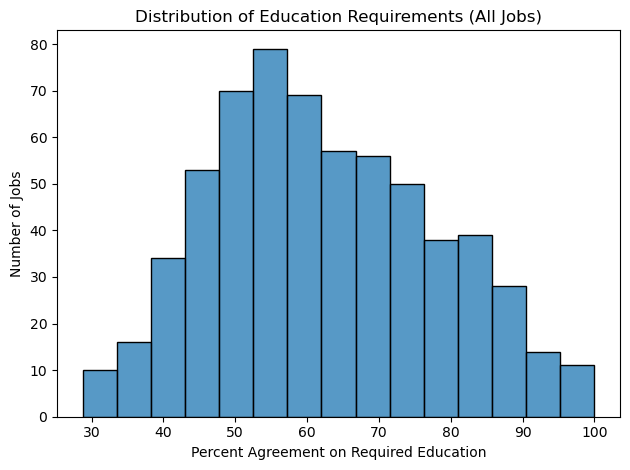

In [22]:
# Education Requirements Distribution
sns.histplot(job_profiles['Data Value'], bins=15)
plt.title("Distribution of Education Requirements (All Jobs)")
plt.xlabel("Percent Agreement on Required Education")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.savefig('images/education_requirements_distribution.png', dpi=300)
plt.show()

**Interpretation:**
- This histogram illustrates how frequently various education requirement levels appear across all occupations in the dataset.

**Key Insights:**
- Most jobs fall in the 50–70% agreement range, meaning they commonly require some level of formal education (like a diploma or degree).
- Few jobs require extreme levels (near 100% or below 30%), showing that strict educational prerequisites are less common than moderately flexible ones.
- This distribution informs how realistic it is to recommend jobs based on a user’s education level.

## 4. DATA MODELLING: Building The Recommendation Engine (RIASEC-Based)

### 4.1 RIASEC-Only Recommender (Cosine Similarity)
Match based on user interests only.

We'll:
1. Take a user’s RIASEC scores as input
2. Calculate cosine similarity between the user's profile and all jobs
3. Return the top matching jobs

### 4.1.1 Importing Libraries

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

### 4.1.2 Definining User's RIASEC Scores
Creating a test user input (we’ll later replace this with UI the user to self-rate themselves on a 1–7 scale) 

In [24]:
# Example RIASEC scores: [Realistic, Investigative, Artistic, Social, Enterprising, Conventional]
user_riasec = np.array([[2.5, 4.0, 6.0, 5.5, 3.0, 1.5]])

### 4.1.3 Extract job RIASEC profiles

In [25]:
# Defining columns
riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']

# Extracting job RIASEC data
job_riasec_matrix = job_profiles[riasec_cols].values
job_riasec_matrix

array([[0.17333333, 0.63      , 0.24666667, 0.425     , 0.94666667,
        0.49395161],
       [0.20333333, 0.23166667, 0.05166667, 0.395     , 0.99333333,
        0.66129032],
       [0.01166667, 0.11833333, 0.475     , 0.35666667, 1.        ,
        0.45564516],
       ...,
       [0.96166667, 0.235     , 0.        , 0.01166667, 0.145     ,
        0.46774194],
       [1.        , 0.12833333, 0.        , 0.065     , 0.09166667,
        0.47782258],
       [0.97666667, 0.15666667, 0.        , 0.        , 0.05166667,
        0.53225806]])

### 4.1.4 Compute Cosine Similarity

In [26]:
# Computing similarity between user and all job profiles
similarities = cosine_similarity(user_riasec, job_riasec_matrix)

# Flatten similarity array
job_profiles['Similarity'] = similarities.flatten()
job_profiles['Similarity']

1      0.770706
2      0.609859
4      0.717941
5      0.661115
6      0.550885
         ...   
991    0.438420
992    0.406629
993    0.412000
994    0.389535
995    0.358109
Name: Similarity, Length: 624, dtype: float64

### 4.1.5 Cosine Similarity Distribution

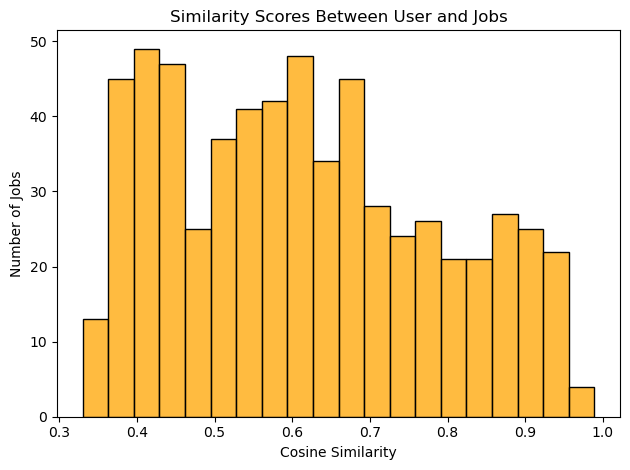

In [27]:
# Similarity Score Distribution 
sns.histplot(job_profiles['Similarity'].values, bins=20, color='orange')
plt.title("Similarity Scores Between User and Jobs")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Jobs")
plt.tight_layout()
plt.savefig('images/similarity_scores_distribution.png', dpi=300)
plt.show()

**Interpretation:**
This histogram shows the distribution of cosine similarity scores between the user’s profile and different job descriptions.

- X-axis: Cosine similarity score (0 to 1). Higher scores mean higher similarity.
- Y-axis: Number of jobs within each similarity range.

**Key Insights:**
- This helps visualize how many jobs are highly relevant to the user. 
- A concentration of bars toward the higher end means many jobs closely match the user’s profile.

### 4.1.6 Getting Top Career Matches

In [28]:
# Sorting and viewing top 10 matches
top_matches = job_profiles.sort_values(by='Similarity', ascending=False).head(10)

# Show selected columns
top_matches[['Title', 'Description', 'Similarity']]

,Title,Description,Similarity
433,Music Therapists,"Plan, organize, direct, or assess clinical and...",0.989178
432,Art Therapists,Plan or conduct art therapy sessions or progra...,0.980727
325,"Art, Drama, and Music Teachers, Postsecondary","Teach courses in drama, music, and the arts in...",0.970056
301,"Architecture Teachers, Postsecondary",Teach courses in architecture and architectura...,0.960932
327,"English Language and Literature Teachers, Post...",Teach courses in English language and literatu...,0.945059
311,"Area, Ethnic, and Cultural Studies Teachers, P...",Teach courses pertaining to the culture and de...,0.944548
326,"Communications Teachers, Postsecondary","Teach courses in communications, such as organ...",0.942476
329,"History Teachers, Postsecondary",Teach courses in human history and historiogra...,0.938226
330,"Philosophy and Religion Teachers, Postsecondary","Teach courses in philosophy, religion, and the...",0.937764
328,"Foreign Language and Literature Teachers, Post...",Teach languages and literature courses in lang...,0.937614


**Interpretation:**
- We ranked all job profiles based on how similar they are to the user’s RIASEC personality scores, using cosine similarity.
- Similarity = 0.99 → The user’s RIASEC profile is very closely aligned with the profile for this occupation.
- The top jobs are:
    - Creative, social, and teaching-oriented
    - Strongly aligned with Artistic (A), Social (S), and Investigative (I) dimensions
- If the user’s profile had high values for S, A, and I, this makes perfect sense.

**What To Say to Users:**
"Based on your interests, you may enjoy careers where creativity, human connection, and education intersect. Here are the top matches for your profile!"

### 4.1.6 Recreating user_vector

In [29]:
# Defining example user input
user_riasec = {
    'R': 3.0,
    'I': 4.5,
    'A': 2.0,
    'S': 5.0,
    'E': 3.5,
    'C': 1.0
}

# Converting to NumPy array for comparison
user_vector = np.array([list(user_riasec.values())])

### 4.1.7 RIASEC Radar Chart Comparing User vs Top Job
Visualize the match to help explain recommendations.

In [30]:
import plotly.graph_objects as go

# Get RIASEC of user and top match
categories = ['R', 'I', 'A', 'S', 'E', 'C']
user_scores = user_vector.flatten()
top_job_scores = top_matches.iloc[0][categories].values  # First match

# Radar plot
fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=user_scores, theta=categories, fill='toself', name='User'))
fig.add_trace(go.Scatterpolar(r=top_job_scores, theta=categories, fill='toself', name='Top Job Match'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)), title="RIASEC Match: User vs Top Job")
fig.show()

**Interpretation:**
This radar chart compares the user’s RIASEC scores (Realistic, Investigative, Artistic, Social, Enterprising, Conventional) with the top-matching job’s RIASEC profile.

- Blue area: The user’s RIASEC profile.
- Red area: The top job’s RIASEC profile.

**Key Insights:**

The closer the shapes overlap, the better the match in terms of interests and work preferences. Large differences may suggest a mismatch even if the similarity score is high. 

### 4.2 RIASEC + Education-Aware Recommender (Filtered Similarity)
Objective: Refine job recommendations by including an education-level filter alongside RIASEC similarity, ensuring users only see jobs they're qualified for.
 - Match based on user interests
 - Filter jobs by user’s education level (Bachelor’s degree, in this case).

This enhancement filters out occupations that require a higher level of education than the user has attained. We still rank by RIASEC similarity, but only among jobs within the user's educational qualification range.
We'll now:
- Ask user for their education level
- Filter job_profiles to remove jobs that require more education than the user has
- Return final recommendations (sorted by RIASEC similarity)

### 4.2.1 Map User’s Education to Numeric Levels
We’ll assume a basic mapping from O*NET's common education phrases to numbers for comparison.

In [31]:
# Mapping education to numeric levels
education_levels = {
    'No formal educational credential': 0,
    'High school diploma or equivalent': 1,
    'Some college, no degree': 2,
    'Associate\'s degree': 3,
    'Bachelor\'s degree': 4,
    'Master\'s degree': 5,
    'Doctoral or professional degree': 6
}

### 4.2.2 Mapping Occupation Education Requirements to Numeric Scale

In [32]:
# Creating a mapping manually 
edu_mapping = {
    'No formal educational credential': 0,
    'High school diploma or equivalent': 1,
    'Some college, no degree': 2,
    'Associate\'s degree': 3,
    'Bachelor\'s degree': 4,
    'Master\'s degree': 5,
    'Doctoral or professional degree': 6,
    'Related Work Experience': 3,     
    'Postsecondary non-degree award': 2,
    'Required Level of Education': 4, 
    'Less than high school diploma': 0
}

# Applying to job_profiles
job_profiles['Education_Level_Code'] = job_profiles['Education Level'].map(edu_mapping)

### 4.2.3 Filtering Jobs by Education

In [33]:
user_education_level = 5 

# Removing jobs requiring more education than the user has
filtered_jobs = job_profiles[job_profiles['Education_Level_Code'] <= user_education_level]

# Sorting by similarity and show top 10
top_filtered_matches = filtered_jobs.sort_values(by='Similarity', ascending=False).head(10)

# Results
top_filtered_matches[['Title', 'Description', 'Similarity', 'Education Level']]

,Title,Description,Similarity,Education Level
433,Music Therapists,"Plan, organize, direct, or assess clinical and...",0.989178,Required Level of Education
432,Art Therapists,Plan or conduct art therapy sessions or progra...,0.980727,Required Level of Education
325,"Art, Drama, and Music Teachers, Postsecondary","Teach courses in drama, music, and the arts in...",0.970056,Required Level of Education
301,"Architecture Teachers, Postsecondary",Teach courses in architecture and architectura...,0.960932,Required Level of Education
327,"English Language and Literature Teachers, Post...",Teach courses in English language and literatu...,0.945059,Required Level of Education
311,"Area, Ethnic, and Cultural Studies Teachers, P...",Teach courses pertaining to the culture and de...,0.944548,Required Level of Education
326,"Communications Teachers, Postsecondary","Teach courses in communications, such as organ...",0.942476,Required Level of Education
329,"History Teachers, Postsecondary",Teach courses in human history and historiogra...,0.938226,Required Level of Education
330,"Philosophy and Religion Teachers, Postsecondary","Teach courses in philosophy, religion, and the...",0.937764,Required Level of Education
328,"Foreign Language and Literature Teachers, Post...",Teach languages and literature courses in lang...,0.937614,Required Level of Education


**Interpretation:**

The top 10 recommended occupations (e.g., Music Therapists, Art Therapists, Postsecondary Teachers) are:
- Highly aligned with the user’s RIASEC profile (cosine similarity scores above 0.93).
- Filtered to match the user’s education level (in this case: Bachelor’s degree).

Each job listed requires a "Required Level of Education", which—based on our mapping is aligned with or below the user’s qualification. This ensures the recommendations are both personally relevant and practically attainable.

| Criteria            | Option A (RIASEC Only)                                 | Option B (RIASEC + Education Filter)                 |
| ------------------- | ------------------------------------------------------ | ---------------------------------------------------- |
| Personal Fit        | Based on interest similarity                           | Same interest-based similarity                     |
| Education Relevance | Might include jobs the user is **not qualified** for   | Only includes jobs the user **is qualified** for   |
| Example Roles       | May include CEOs, lawyers, physicians                  | Shows more accessible jobs like therapists, teachers |
| Use Case            | Exploratory career matching                            | Realistic, action-ready suggestions                  |

**Conclusion:**

Option B delivers personalized and qualified career matches helping users explore realistic job opportunities while staying aligned with their interests.

### 4.2.4 Comparison Bar Chart for Cosine Similarity(Option A) Scores vs Filtered Similarity(Option B)
This compares the cosine similarity scores of the top 10 jobs from Option A vs Option B

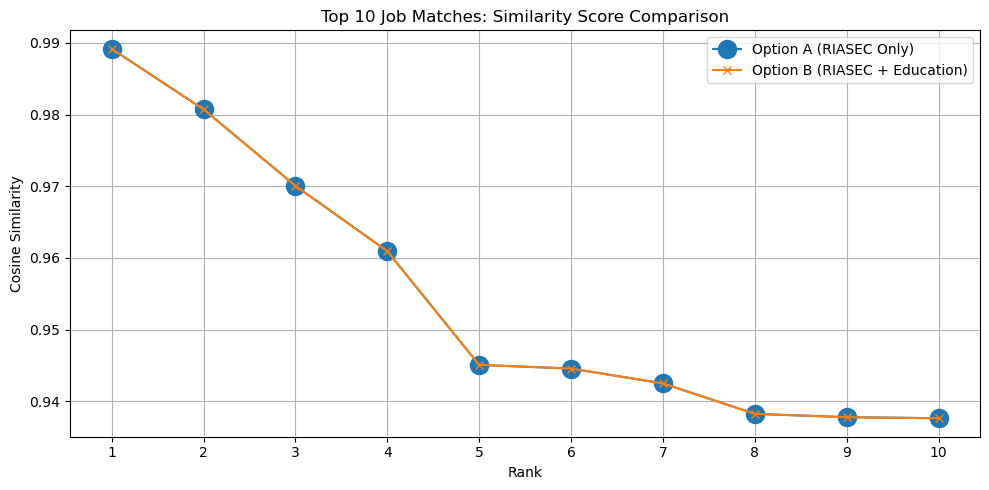

In [34]:
# Preparing data
option_a_scores = top_matches['Similarity'].to_numpy()
option_b_scores = top_filtered_matches['Similarity'].to_numpy()
titles = [f'{i+1}' for i in range(len(option_a_scores))]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(titles, option_a_scores, marker='o', markersize=13, label='Option A (RIASEC Only)')
plt.plot(titles, option_b_scores, marker='x', label='Option B (RIASEC + Education)')
plt.title('Top 10 Job Matches: Similarity Score Comparison')
plt.xlabel('Rank')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/top_job_matches_comparison.png', dpi=300)
plt.show()

**Interpretation: Option A vs Option B:**
- In this particular case, the user's RIASEC profile aligns most strongly with careers in education and therapy, occupations that typically require a Bachelor's degree, which is the user's stated qualification.
- Therefore, the education filter in Option B did not exclude any of the top jobs from Option A.
- This confirms that the initial recommendations were already realistic, but Option B ensures that no overqualified matches slip through for other users.

**Recommendation:**
All 624 occupations in the dataset have a minimum Education_Level_Code of 4, which corresponds to a Bachelor’s degree requirement. In future iterations of SmartPath, we recommend:
- Incorporating more O*NET datasets such as Job Zones, Tasks, or Detailed Work Activities, which often include jobs requiring only a high school diploma or less.
- Enriching the dataset with jobs from other sources (e.g., trade, gig economy, or apprenticeship programs).

### 4.2.5 Count Plot: How Many Jobs Were Filtered Out

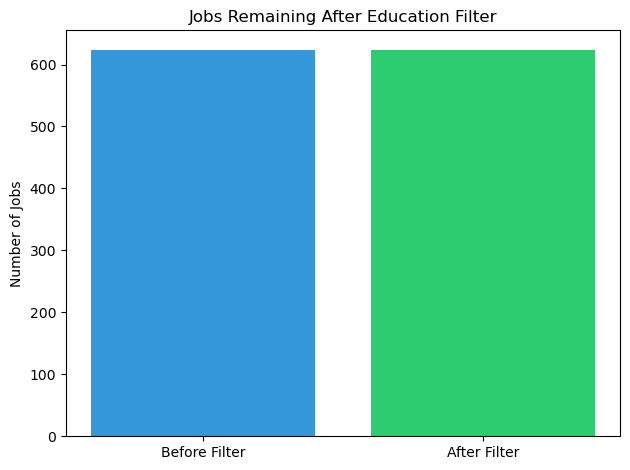

In [35]:
# Counting jobs before and after filtering
total_jobs = len(job_profiles)
filtered_jobs_count = len(filtered_jobs)

# Bar plot
plt.bar(['Before Filter', 'After Filter'], [total_jobs, filtered_jobs_count], color=['#3498db', '#2ecc71'])
plt.title('Jobs Remaining After Education Filter')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.savefig('images/jobs_remaining_after_education_filter.png', dpi=300)
plt.show()

All 624 occupations in the dataset have a minimum Education_Level_Code of 4, which corresponds to a Bachelor’s degree requirement. As a result no jobs filtered out.

## PHASE 5: Enhance Recommendations with Top Skills per Job
Goal: To demonstrate how key skills needed for each recommended job.

We already have top_skills_df, which contains the top 10 important skills for each job (ONET_Code). Now, we’ll attach those to the top matches in both Option A and Option B.

In [36]:
# Merging top 10 job matches (Option A or B) with top skills
def attach_skills(top_jobs, skills_df):
    skill_info = skills_df[['ONET_Code', 'Element Name', 'Data Value']]
    merged = top_jobs.merge(skill_info, on='ONET_Code', how='left')
    return merged

# Example with Option B
top_b_with_skills = attach_skills(top_filtered_matches, top_skills_df)

# Preview(Show job, skill, and importance score)
top_b_with_skills[['Title', 'Element Name', 'Data Value_y']].head(15)

,Title,Element Name,Data Value_y
0,Music Therapists,Social Perceptiveness,4.25
1,Music Therapists,Active Listening,4.12
2,Music Therapists,Reading Comprehension,4.00
3,Music Therapists,Speaking,4.00
4,Music Therapists,Service Orientation,4.00
5,Music Therapists,Critical Thinking,4.00
6,Music Therapists,Learning Strategies,3.75
7,Music Therapists,Judgment and Decision Making,3.75
8,Music Therapists,Monitoring,3.75
9,Music Therapists,Active Learning,3.25


We have now successfully added skill insights to each recommended job (Option B). This helps users understand what skills to focus on or upskill in if they’re considering a specific role.

In [37]:
# Renaming Data Value_y  to "Skill Importance" for clarity 
top_b_with_skills.rename(columns={'Data Value_y': 'Skill Importance'}, inplace=True)
top_b_with_skills[['Title', 'Element Name', 'Skill Importance']].head(15)

,Title,Element Name,Skill Importance
0,Music Therapists,Social Perceptiveness,4.25
1,Music Therapists,Active Listening,4.12
2,Music Therapists,Reading Comprehension,4.00
3,Music Therapists,Speaking,4.00
4,Music Therapists,Service Orientation,4.00
5,Music Therapists,Critical Thinking,4.00
6,Music Therapists,Learning Strategies,3.75
7,Music Therapists,Judgment and Decision Making,3.75
8,Music Therapists,Monitoring,3.75
9,Music Therapists,Active Learning,3.25


### 5. Enhancing Job Matches with Abilities, Tasks & Education

In [38]:
# Attaching top skills to top jobs
def attach_skills(top_jobs, skills_df):
    skill_info = skills_df[['ONET_Code', 'Element Name', 'Data Value']]
    merged = top_jobs.merge(skill_info, on='ONET_Code', how='left')
    merged.rename(columns={'Element Name': 'Skill'}, inplace=True)
    return merged

# Attaching top abilities
def attach_abilities(top_jobs, abilities_df):
    ability_info = abilities_df[['ONET_Code', 'Ability', 'Data Value']].copy()
    merged = top_jobs.merge(ability_info, on='ONET_Code', how='left')
    return merged

# Attaching emerging tasks
def attach_emerging_tasks(top_jobs, tasks_df):
    task_info = tasks_df[['ONET_Code', 'Task']].drop_duplicates()
    merged = top_jobs.merge(task_info, on='ONET_Code', how='left')
    return merged

# Attaching Education, Training & Experience Categories
def attach_edu_categories(top_jobs, edu_cat_df):
    cat_info = edu_cat_df[['ONET_Code', 'Category']].drop_duplicates()
    merged = top_jobs.merge(cat_info, on='ONET_Code', how='left')
    return merged

In [39]:
# Attaching Skills
top_b_with_skills = attach_skills(top_filtered_matches, top_skills_df)

# Attaching Abilities
top_b_with_abilities = attach_abilities(top_b_with_skills, abilities_df)

# Attaching Emerging Tasks
top_b_with_tasks = attach_emerging_tasks(top_b_with_abilities, emerging_tasks_df)

# Merging education info into top_b_with_tasks to create top_b_enhanced
top_b_enhanced = top_b_with_tasks.merge(
    edu_df_with_cat[['ONET_Code', 'Education Level', 'Education Category']],
    on='ONET_Code',
    how='left'
)

top_b_enhanced.rename(columns={
    'Data Value_y': 'Skill Score',
    'Education Level_y': 'Top Education Level',
    'Education Category_y': 'Education Category'
}, inplace=True)

# Result
top_b_enhanced[['Title', 'Skill', 'Skill Score', 'Ability', 'Task', 'Top Education Level', 'Education Category']].head(10)

,Title,Skill,Skill Score,Ability,Task,Top Education Level,Education Category
0,Music Therapists,Social Perceptiveness,4.25,Oral Comprehension,NaN,Required Level of Education,6.0
1,Music Therapists,Social Perceptiveness,4.25,Written Comprehension,NaN,Required Level of Education,6.0
2,Music Therapists,Social Perceptiveness,4.25,Oral Expression,NaN,Required Level of Education,6.0
3,Music Therapists,Social Perceptiveness,4.25,Written Expression,NaN,Required Level of Education,6.0
4,Music Therapists,Social Perceptiveness,4.25,Fluency of Ideas,NaN,Required Level of Education,6.0
5,Music Therapists,Social Perceptiveness,4.25,Originality,NaN,Required Level of Education,6.0
6,Music Therapists,Social Perceptiveness,4.25,Problem Sensitivity,NaN,Required Level of Education,6.0
7,Music Therapists,Social Perceptiveness,4.25,Deductive Reasoning,NaN,Required Level of Education,6.0
8,Music Therapists,Social Perceptiveness,4.25,Inductive Reasoning,NaN,Required Level of Education,6.0
9,Music Therapists,Social Perceptiveness,4.25,Information Ordering,NaN,Required Level of Education,6.0


In [40]:
missing_tasks = top_b_enhanced['Task'].isna().sum()
print(f"{missing_tasks} of {len(top_b_enhanced)} top job matches have no emerging tasks listed.")

4160 of 5720 top job matches have no emerging tasks listed.


4160 out of 5720 top job matches have no emerging tasks listed, which means over 72% of our top job matches have no emerging task data which is quite significant.

This Means: The emerging_tasks_df dataset doesn't cover most job codes We are working with. This may be due to:
- It only includes new or evolving occupations
- It is a subset of all ONET roles
- Some job codes do not match exactly

**Next Action:**
We will the placeholder strategy to keep the dataset complete but transparent

In [41]:
top_b_enhanced['Task'] = top_b_enhanced['Task'].fillna('No Emerging Task Listed')
top_b_enhanced[['Title', 'Skill', 'Skill Score', 'Ability', 'Task', 'Top Education Level', 'Education Category']].head(10)

,Title,Skill,Skill Score,Ability,Task,Top Education Level,Education Category
0,Music Therapists,Social Perceptiveness,4.25,Oral Comprehension,No Emerging Task Listed,Required Level of Education,6.0
1,Music Therapists,Social Perceptiveness,4.25,Written Comprehension,No Emerging Task Listed,Required Level of Education,6.0
2,Music Therapists,Social Perceptiveness,4.25,Oral Expression,No Emerging Task Listed,Required Level of Education,6.0
3,Music Therapists,Social Perceptiveness,4.25,Written Expression,No Emerging Task Listed,Required Level of Education,6.0
4,Music Therapists,Social Perceptiveness,4.25,Fluency of Ideas,No Emerging Task Listed,Required Level of Education,6.0
5,Music Therapists,Social Perceptiveness,4.25,Originality,No Emerging Task Listed,Required Level of Education,6.0
6,Music Therapists,Social Perceptiveness,4.25,Problem Sensitivity,No Emerging Task Listed,Required Level of Education,6.0
7,Music Therapists,Social Perceptiveness,4.25,Deductive Reasoning,No Emerging Task Listed,Required Level of Education,6.0
8,Music Therapists,Social Perceptiveness,4.25,Inductive Reasoning,No Emerging Task Listed,Required Level of Education,6.0
9,Music Therapists,Social Perceptiveness,4.25,Information Ordering,No Emerging Task Listed,Required Level of Education,6.0


### 5.2 Using the suprise model to recommend jobs based on RIASEC scores and education level
- We will use the Surprise library to build a collaborative filtering model that recommends jobs based on user
RIASEC scores and education level.


In [57]:
job_profiles.head()

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Similarity,Education_Level_Code
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.493952,0.946667,5.0,0.630000,0.173333,2.0,0.425000,6.0,Required Level of Education,74.07,11.0,0.770706,4
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.661290,0.993333,5.0,0.231667,0.203333,6.0,0.395000,0.0,Required Level of Education,28.76,10.0,0.609859,4
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.455645,1.000000,5.0,0.118333,0.011667,6.0,0.356667,3.0,Required Level of Education,60.02,1.0,0.717941,4
5,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.536290,1.000000,5.0,0.316667,0.000000,6.0,0.303333,0.0,Required Level of Education,55.76,7.0,0.661115,4
6,11-2022.00,Sales Managers,"Plan, direct, or coordinate the actual distrib...",0.051667,0.713710,1.000000,5.0,0.110000,0.081667,6.0,0.381667,0.0,Required Level of Education,65.22,11.0,0.550885,4


In [61]:
# Importing Surprise library for collaborative filtering
from surprise import Dataset, Reader
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, NormalPredictor


In [ ]:
# Loading the job profiles into Surprise format

surprise_df = job_profiles[['ONET_Code', 'Title', 'Similarity']]

reader = Reader(rating_scale=(0, 1))  # Assuming similarity scores are between 0 and 1
data = Dataset.load_from_df(surprise_df, reader)

# Splitting the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Building a collaborative filtering model using KNN
knn_model = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
knn_model.fit(trainset)
# Making predictions on the test set
predictions = knn_model.test(testset)
# Calculating RMSE to evaluate the model
rmse = accuracy.rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.1682


In [66]:
# Implementing a grid search for hyperparameter tuning(Using KNNBasic)
from surprise.model_selection import GridSearchCV

param_grid = {
    'k': [5, 10, 15],
    'sim_options': {
        'name': ['cosine', 'pearson'],
        'user_based': [False]  # Item-based collaborative filtering
    }
}

grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)
grid_search.fit(data)

# Best parameters from grid search
best_params = grid_search.best_params['rmse']
print(f"Best parameters: {best_params}")
# Best RMSE score
best_rmse = grid_search.best_score['rmse']
print(f"Best RMSE: {best_rmse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

In [65]:
# Implementing a grid search for SVD model

svd_param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [20, 30, 40],
              'lr_all': [0.005, 0.01, 0.02],
              'reg_all': [0.02, 0.1, 0.2]}

grid_search_svd = GridSearchCV(SVD, svd_param_grid, measures=['rmse'], cv=3)
grid_search_svd.fit(data)
# Best parameters from grid search
best_params_svd = grid_search_svd.best_params['rmse']
print(f"Best parameters for SVD: {best_params_svd}")
print(f"Best RMSE for SVD: {grid_search_svd.best_score['rmse']}")

Best parameters for SVD: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
Best RMSE for SVD: 0.17004317344399622


In [69]:
# Creating and evaluating the final SVD model with best parameters
from surprise import SVD

# Instantiate SVD with best parameters
final_svd = SVD(
    n_factors=best_params_svd['n_factors'],
    n_epochs=best_params_svd['n_epochs'],
    lr_all=best_params_svd['lr_all'],
    reg_all=best_params_svd['reg_all']
)

# Fit on the training set
final_svd.fit(trainset)

# Make predictions on the test set
svd_predictions = final_svd.test(testset)

# Calculate RMSE for the SVD model
svd_rmse = accuracy.rmse(svd_predictions)
print(f"SVD Model RMSE: {svd_rmse}")


RMSE: 0.1682
SVD Model RMSE: 0.16821972172103833


In [87]:
# We can now build a reccommendation system using the SVD model
def recommend_jobs(user_vector=None, top_n=10, education_level=None):
    """
    Recommend jobs based on user RIASEC scores and education level using SVD model.
    
    Parameters:
    - user_vector: np.array, shape (1, 6) containing RIASEC scores
    - top_n: int, number of top job recommendations to return
    - education_level: int, optional, user's education level code (0-6)
    
    Returns:
    - DataFrame with recommended jobs
    """
    # Prompt user for RIASEC scores if not provided
    if user_vector is None:
        print("Please enter your RIASEC scores (values between 1 and 7):")
        r = float(input("R (Realistic): "))
        i = float(input("I (Investigative): "))
        a = float(input("A (Artistic): "))
        s = float(input("S (Social): "))
        e = float(input("E (Enterprising): "))
        c = float(input("C (Conventional): "))
        user_vector = np.array([[r, i, a, s, e, c]])
    else:
        user_vector = np.array(user_vector).reshape(1, -1)
        
    # Predict ratings for all jobs
    job_codes = job_profiles['ONET_Code'].unique()
    predictions = []

    # If education level is provided, filter jobs accordingly
    if education_level is not None:
        job_codes = job_profiles[job_profiles['Education_Level_Code'] <= education_level]['ONET_Code'].unique()

    # Predict similarity for each job code
    for code in job_codes:
        pred = final_svd.predict(uid=code, iid=code, r_ui=None)
        predictions.append((code, pred.est))
    
    # Create DataFrame of predictions
    pred_df = pd.DataFrame(predictions, columns=['ONET_Code', 'Estimated_Similarity'])
    
    # Merge with job profiles to get titles and descriptions
    recommended_jobs = pred_df.merge(job_profiles[['ONET_Code', 'Title', 'Description']], on='ONET_Code')
    
    # Sort by estimated similarity and return top N jobs
    recommended_jobs = recommended_jobs.sort_values(by='Estimated_Similarity', ascending=False).head(top_n)
    
    return recommended_jobs[['Title', 'Description', 'Estimated_Similarity']]



In [89]:
# Testing the recommendation system with a sample user vector
# Example RIASEC scores
recommended_jobs = recommend_jobs(top_n=10, education_level=5)  # Assuming user has a Master's degree
# Display recommended jobs
recommended_jobs 

Please enter your RIASEC scores (values between 1 and 7):


,Title,Description,Estimated_Similarity
220,"Career/Technical Education Teachers, Postsecon...",Teach vocational courses intended to provide o...,0.660393
226,"Career/Technical Education Teachers, Secondary...","Teach occupational, vocational, career, or tec...",0.656719
213,"Communications Teachers, Postsecondary","Teach courses in communications, such as organ...",0.655843
194,"Business Teachers, Postsecondary",Teach courses in business administration and m...,0.654083
228,"Special Education Teachers, Secondary School","Teach academic, social, and life skills to sec...",0.654031
265,"Low Vision Therapists, Orientation and Mobilit...",Provide therapy to patients with visual impair...,0.653453
196,"Architecture Teachers, Postsecondary",Teach courses in architecture and architectura...,0.653190
267,Recreational Therapists,"Plan, direct, or coordinate medically-approved...",0.652618
59,Training and Development Specialists,Design or conduct work-related training and de...,0.652453
234,Farm and Home Management Educators,Instruct and advise individuals and families e...,0.652361


### PHASE 6: IMPLEMENTING UNSUPERVISED METHODS(K-MEANS CLUSTERING)

### 6.1: We can attempt to use a kmeans clustering model to assigh the user to certain cluster based on the RIASEC scores and the education level required for the job.

In [43]:
# Importing clustering libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [71]:
# Using KMeans clustering to group jobs based on RIASEC scores

# Select RIASEC columns for clustering
riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
X = job_profiles[riasec_cols]

# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
job_profiles['Cluster'] = kmeans.fit_predict(X)

# Map cluster assignments to top_filtered_matches using ONET_Code
top_filtered_matches = top_filtered_matches.copy()
top_filtered_matches['Cluster'] = top_filtered_matches['ONET_Code'].map(
	job_profiles.set_index('ONET_Code')['Cluster']
)

# Show cluster assignments
top_filtered_matches[['Title', 'Cluster']]

c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,Title,Cluster
433,Music Therapists,0
432,Art Therapists,0
325,"Art, Drama, and Music Teachers, Postsecondary",0
301,"Architecture Teachers, Postsecondary",0
327,"English Language and Literature Teachers, Post...",0
311,"Area, Ethnic, and Cultural Studies Teachers, P...",0
326,"Communications Teachers, Postsecondary",0
329,"History Teachers, Postsecondary",0
330,"Philosophy and Religion Teachers, Postsecondary",0
328,"Foreign Language and Literature Teachers, Post...",0


c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans 

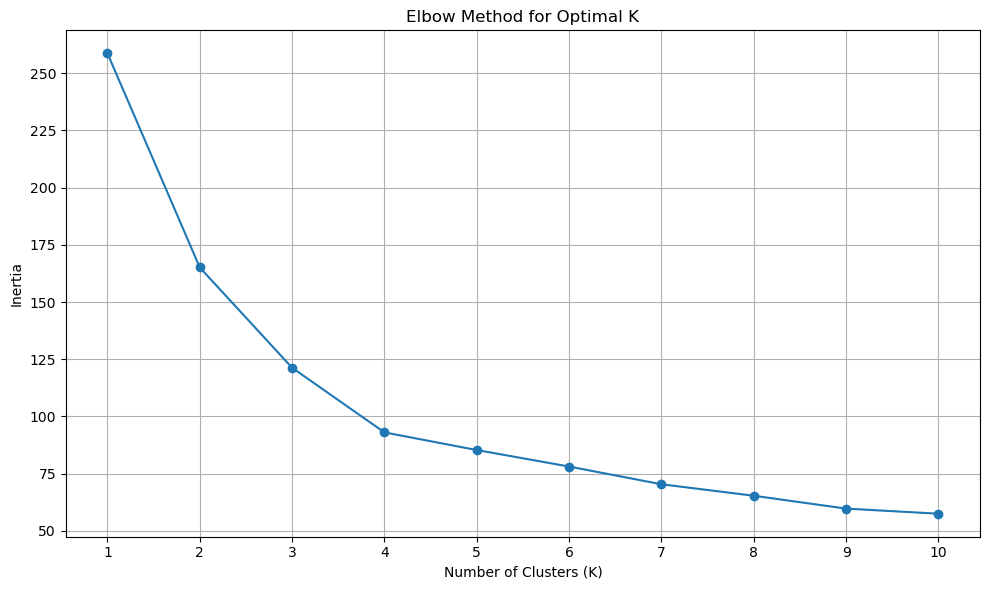

In [72]:
# Finding optimal number of clusters using Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

* Implementing the optimal number of clusters to the model. i.e  k=4

In [74]:
optimal_k = 4

# Using the optimal number of clusters on the filtered matches
riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
top_filtered_matches['Cluster'] = kmeans.fit_predict(top_filtered_matches[riasec_cols])
# Show cluster assignments
top_filtered_matches[['Title', 'Cluster']].head(10)

c:\Users\eugene.maina\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,Title,Cluster
433,Music Therapists,2
432,Art Therapists,2
325,"Art, Drama, and Music Teachers, Postsecondary",1
301,"Architecture Teachers, Postsecondary",0
327,"English Language and Literature Teachers, Post...",3
311,"Area, Ethnic, and Cultural Studies Teachers, P...",3
326,"Communications Teachers, Postsecondary",3
329,"History Teachers, Postsecondary",3
330,"Philosophy and Religion Teachers, Postsecondary",3
328,"Foreign Language and Literature Teachers, Post...",3


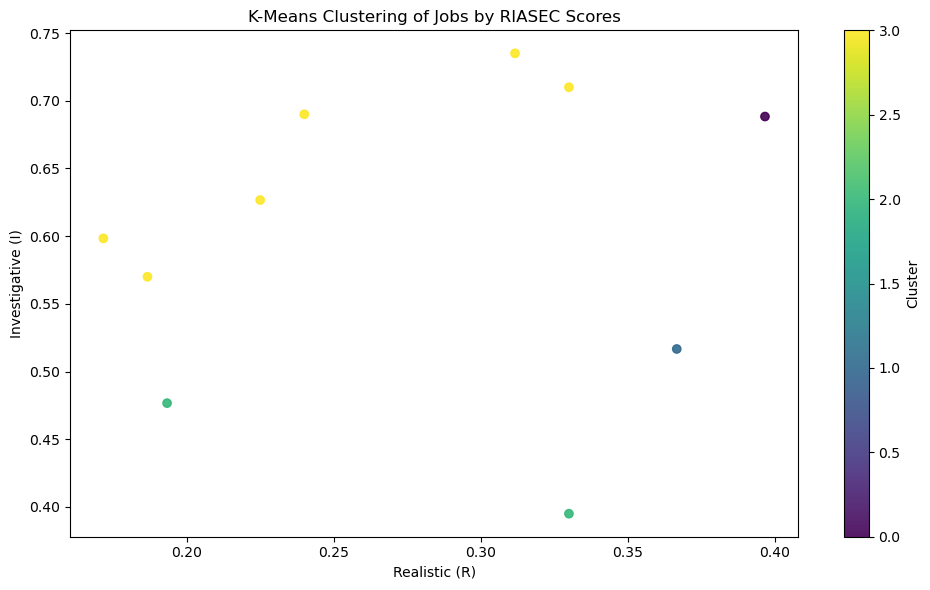

In [75]:
# Plotting the clusters with optimal K
plt.figure(figsize=(10, 6))
plt.scatter(top_filtered_matches['R'], top_filtered_matches['I'], c=top_filtered_matches['Cluster'], cmap='viridis', alpha=0.9) 
plt.title('K-Means Clustering of Jobs by RIASEC Scores')
plt.xlabel('Realistic (R)')
plt.ylabel('Investigative (I)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

                                                 Title      PCA1      PCA2  \
433                                   Music Therapists  0.216335 -0.145658   
432                                     Art Therapists  0.362726 -0.014236   
325      Art, Drama, and Music Teachers, Postsecondary  0.262755  0.137396   
301               Architecture Teachers, Postsecondary -0.048240  0.123986   
327  English Language and Literature Teachers, Post... -0.094090 -0.031891   
311  Area, Ethnic, and Cultural Studies Teachers, P... -0.134358  0.084273   
326             Communications Teachers, Postsecondary -0.124787 -0.107334   
329                    History Teachers, Postsecondary -0.169868  0.062501   
330    Philosophy and Religion Teachers, Postsecondary -0.161822 -0.004750   
328  Foreign Language and Literature Teachers, Post... -0.108652 -0.104287   

     Cluster  
433        2  
432        2  
325        1  
301        0  
327        3  
311        3  
326        3  
329        3  
330   

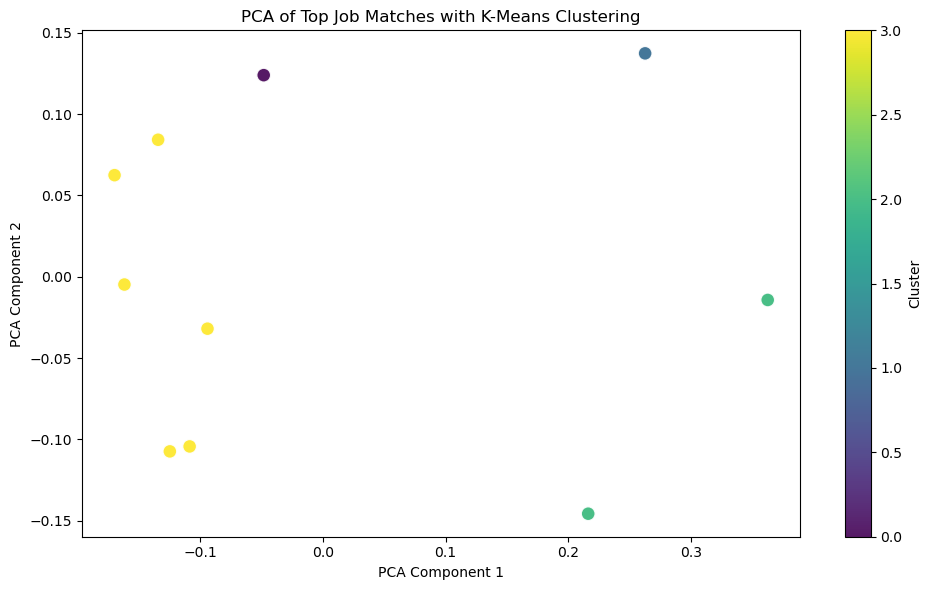

In [77]:
# Using PCA for dimensionality reduction on the filtered matches only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(top_filtered_matches[riasec_cols])
# Adding PCA components to DataFrame
top_filtered_matches['PCA1'] = X_pca[:, 0]
top_filtered_matches['PCA2'] = X_pca[:, 1]
# Show PCA results
print(top_filtered_matches[['Title', 'PCA1', 'PCA2', 'Cluster']].head(10))


# Plotting PCA results with clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    top_filtered_matches['PCA1'],
    top_filtered_matches['PCA2'],
    c=top_filtered_matches['Cluster'],
    cmap='viridis',
    alpha=0.9,
    edgecolors='w',
    s=100
)
plt.title('PCA of Top Job Matches with K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

### Visualization

#### A. Top Skills by Frequency

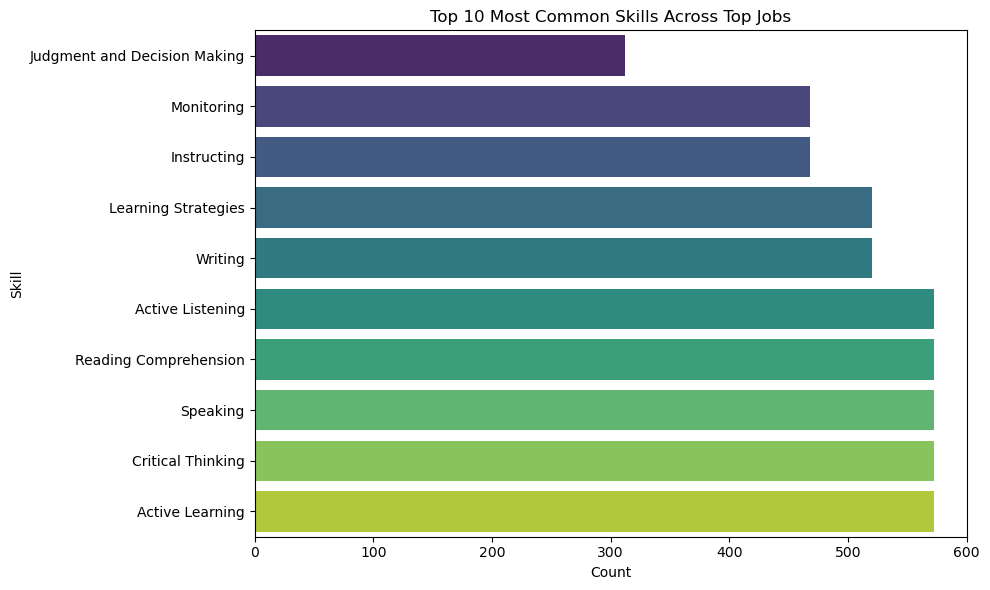

In [49]:
top_skills_plot = (
    top_b_enhanced['Skill']
    .value_counts()
    .nlargest(10)
    .sort_values()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_skills_plot.values,
    y=top_skills_plot.index,
    hue=top_skills_plot.index,  # Set hue to match the y-axis variable
    dodge=False,
    palette='viridis',
    legend=False  # Optional: Hides legend since it's redundant
)
plt.title('Top 10 Most Common Skills Across Top Jobs')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.tight_layout()
plt.savefig('images/top_skills_across_jobs.png', dpi=300)
plt.show()

### B. Top Abilities Bar Plot

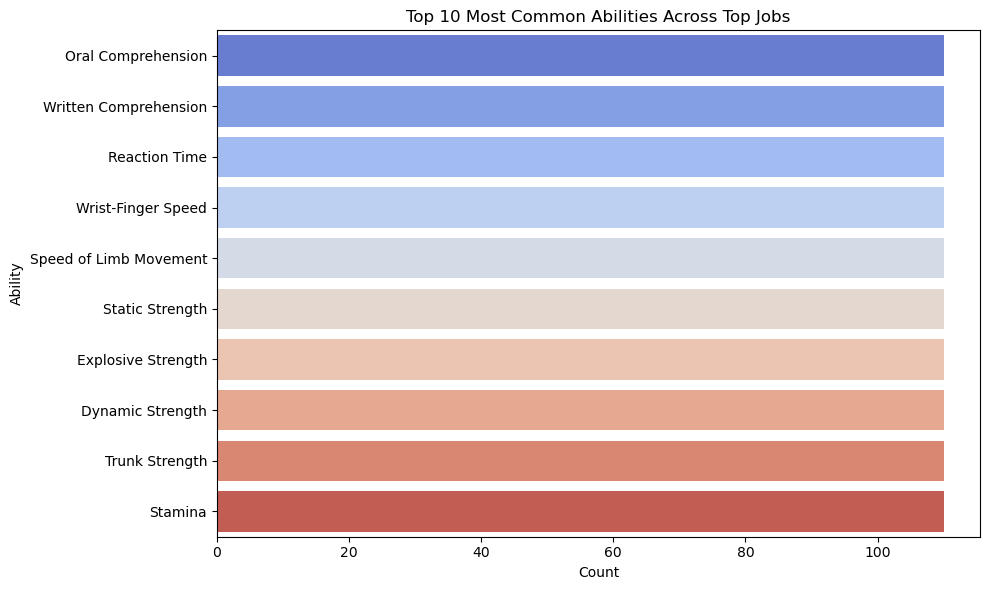

In [50]:
top_abilities_plot = (
    top_b_enhanced['Ability']
    .value_counts()
    .nlargest(10)
    .sort_values()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_abilities_plot.values,
    y=top_abilities_plot.index,
    hue=top_abilities_plot.index,
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 Most Common Abilities Across Top Jobs')
plt.xlabel('Count')
plt.ylabel('Ability')
plt.tight_layout()
plt.savefig('images/top_abilities_across_jobs.png', dpi=300)
plt.show()

### C. Top Education Levels

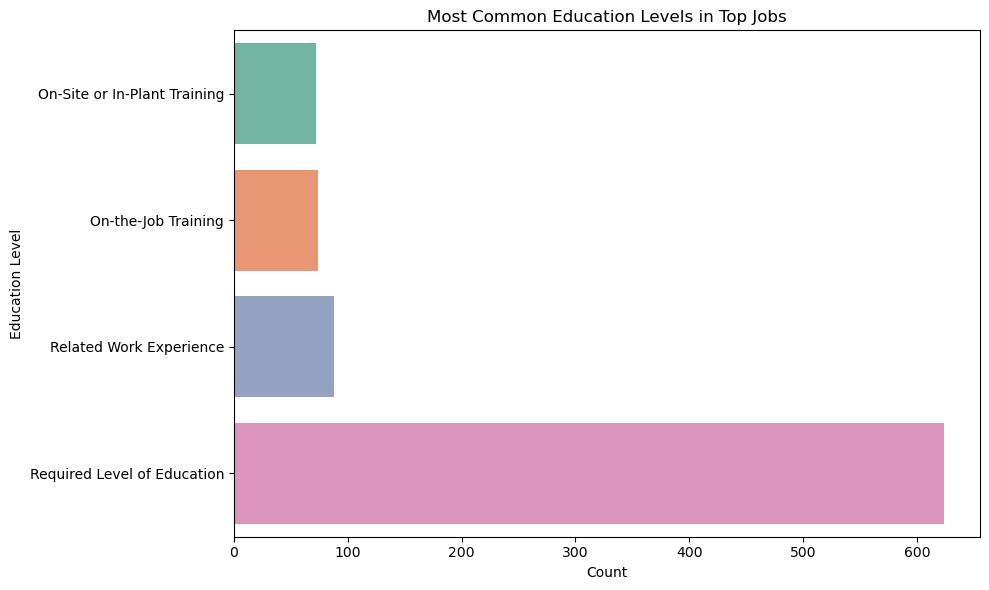

In [51]:
# Plotting the most common education levels in top jobs

plt.figure(figsize=(10, 6))


edu_counts = edu_df_with_cat['Education Level'].value_counts().sort_values()

sns.barplot(
    x=edu_counts.values,
    y=edu_counts.index,
    palette='Set2',
    hue=edu_counts.index,  # Set hue to match the y-axis variable
    dodge=False
)
plt.title('Most Common Education Levels in Top Jobs')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.savefig('images/top_education_levels_in_jobs.png', dpi=300)
plt.show()

In [52]:
# 

### Radar Chart Update (Add Abilities)

In [53]:
# Radar chart for top 5 abilities of the top job match
top_job_title = top_b_enhanced.iloc[0]['Title']
top_abilities = top_b_enhanced[top_b_enhanced['Title'] == top_job_title].nlargest(5, 'Data Value')

categories = top_abilities['Ability'].tolist()
values = top_abilities['Data Value'].tolist()

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r=values,
    theta=categories,
    fill='toself',
    name='Top Job Abilities'
))
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 5])),
    title=f"Top 5 Abilities for '{top_job_title}'"
)
fig.show()